In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xlwings as xw
%matplotlib inline
#pyinstaller '.\Team Task 2.py' --key 123456 -n test -F -w --upx-dir f:\

In [5]:
df1 = pd.read_csv("orders-2016-2020.csv")

In [6]:
df2 = pd.read_csv("review-dataset.csv")
df2.columns

Index(['product_name', 'product_url', 'category', 'status', 'stars'], dtype='object')

In [7]:
df2["stars"]

0       5.0 star rating
1       5.0 star rating
2       5.0 star rating
3       4.9 star rating
4       4.9 star rating
             ...       
1856                NaN
1857                NaN
1858                NaN
1859    5.0 star rating
1860                NaN
Name: stars, Length: 1861, dtype: object

In [8]:
pd.concat([df1["Order Date and Time Stamp"],df2["stars"]],axis=1)

,Order Date and Time Stamp,stars
0,09-11-2020 20:36:26 +0530,5.0 star rating
1,09-11-2020 20:18:26 +0530,5.0 star rating
2,09-11-2020 19:56:21 +0530,5.0 star rating
3,09-11-2020 19:37:40 +0530,4.9 star rating
4,09-11-2020 18:35:47 +0530,4.9 star rating
...,...,...
2292,05-10-2016 04:17:45 +0530,NaN
2293,03-10-2016 15:10:47 +0530,NaN
2294,29-09-2016 18:33:27 +0530,NaN
2295,28-09-2016 18:59:22 +0530,NaN


In [9]:
df1.shape

(2297, 41)

In [10]:
df2.shape

(1861, 5)

In [12]:
df1.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [13]:
df1[(df1["LineItem Name"] == "Mi Neckband Bluetooth Headset with Mic (Black)") | (df1["LineItem Name"] == "JBL Tempo On-Ear Headphone")]

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical
15,R518262208,09-11-2020 07:10:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical
48,R133293099,06-11-2020 17:29:17 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical
52,R674509517,06-11-2020 16:09:23 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical
97,R987878226,04-11-2020 07:16:01 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
103,R843032843,03-11-2020 23:10:43 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
109,R649298150,03-11-2020 20:57:21 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
116,R082271409,03-11-2020 13:47:45 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical
149,R208161276,01-11-2020 16:33:10 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [15]:
df1.columns

Index(['Order #', 'Order Date and Time Stamp', 'Fulfillment Status',
       'Payment Status', 'Payment Date and Time Stamp',
       'Fulfillment Date and Time Stamp', 'Currency', 'Subtotal',
       'Shipping Method', 'Shipping Cost', 'Tax Method', 'Taxes', 'Total',
       'Coupon Code', 'Coupon Code Name', 'Discount', 'Billing Name',
       'Billing Country', 'Billing Street Address', 'Billing Street Address 2',
       'Billing City', 'Billing State', 'Billing Zip', 'Shipping Name',
       'Shipping Country', 'Shipping Street Address',
       'Shipping Street Address 2', 'Shipping City', 'Shipping State',
       'Shipping Zip', 'Gift Cards', 'Payment Method', 'Tracking #',
       'Special Instructions', 'LineItem Name', 'LineItem SKU',
       'LineItem Options', 'LineItem Add-ons', 'LineItem Qty',
       'LineItem Sale Price', 'LineItem Type'],
      dtype='object')

In [18]:
df1.fillna(df1['Shipping Street Address'].mode())

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,R243395005,05-10-2016 04:17:45 +0530,Cancelled,Unpaid,NaN,NaN,INR,₹ 50.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Ear Wired Earphones With Mic White,11,NaN,NaN,1,₹ 50.00,physical
2293,R607209508,03-10-2016 15:10:47 +0530,Cancelled,Unpaid,NaN,NaN,INR,₹ 500.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,I Kall K-66 White,9,NaN,NaN,1,₹ 500.00,physical
2294,R140316623,29-09-2016 18:33:27 +0530,Cancelled,Unpaid,NaN,NaN,INR,"₹ 4,000.00",Ships Free,₹ 0.00,...,NaN,NaN,NaN,Electric Steam Cooker Maestro MC1,1,NaN,NaN,2,"₹ 2,000.00",physical
2295,R192037084,28-09-2016 18:59:22 +0530,Cancelled,Unpaid,NaN,NaN,INR,"₹ 2,000.00",Ships Free,₹ 0.00,...,NaN,NaN,NaN,Electric Steam Cooker Maestro MC1,1,NaN,NaN,1,"₹ 2,000.00",physical


In [19]:
df1['Shipping Street Address']

0       Sec-86 nawada fatehpur, postoffice-Sikanderpur...
1                                                  Nashik
2                           Madhuranagar 2nd stage hostel
3                              Civil line near lic office
4                                 Nps thakur sthan Rajgir
                              ...                        
2292                                                  Gcc
2293             Mayuree bihar,1st lane,near somnathnagar
2294                               mayuree vihar 1st lane
2295                                                 test
2296                                                 test
Name: Shipping Street Address, Length: 2297, dtype: object

In [20]:
df1.isnull().sum()

Order #                               0
Order Date and Time Stamp             0
Fulfillment Status                    0
Payment Status                        0
Payment Date and Time Stamp        2057
Fulfillment Date and Time Stamp    2068
Currency                              0
Subtotal                              0
Shipping Method                       0
Shipping Cost                         0
Tax Method                         2296
Taxes                                 0
Total                                 0
Coupon Code                        2140
Coupon Code Name                   2140
Discount                              0
Billing Name                       1967
Billing Country                    1967
Billing Street Address             1967
Billing Street Address 2           2100
Billing City                       1967
Billing State                      1975
Billing Zip                        1967
Shipping Name                         0
Shipping Country                      0


In [21]:
df1['Payment Date and Time Stamp'].dropna()

164     01-11-2020 09:29:14 +0530
489     16-10-2020 10:56:00 +0530
847     22-09-2020 16:19:12 +0530
904     15-09-2020 15:40:13 +0530
1038    23-08-2020 16:21:29 +0530
                  ...            
2252    27-11-2016 21:46:42 +0530
2253    17-09-2018 15:27:07 +0530
2255    25-10-2016 19:22:46 +0530
2256    27-11-2016 21:45:00 +0530
2296    28-09-2016 19:05:17 +0530
Name: Payment Date and Time Stamp, Length: 240, dtype: object

In [22]:
df1['Payment Date and Time Stamp']

0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                             NaN
                  ...            
2292                          NaN
2293                          NaN
2294                          NaN
2295                          NaN
2296    28-09-2016 19:05:17 +0530
Name: Payment Date and Time Stamp, Length: 2297, dtype: object

In [23]:
df1.fillna(df1['Payment Date and Time Stamp'].mode(),inplace=True)

In [24]:
df1['Payment Date and Time Stamp']

0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                             NaN
                  ...            
2292                          NaN
2293                          NaN
2294                          NaN
2295                          NaN
2296    28-09-2016 19:05:17 +0530
Name: Payment Date and Time Stamp, Length: 2297, dtype: object

<AxesSubplot:ylabel='Payment Method'>

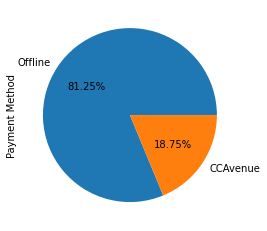

In [25]:
df1['Payment Method'].dropna().str.split().apply(lambda x:x[0]).value_counts().plot(kind = 'pie',autopct='%0.2f%%',figsize=(8,4))

In [27]:
df2.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating


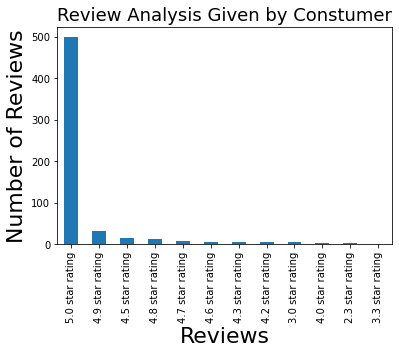

In [29]:
def Review_Analysis():
    fig = plt.figure()
    plt.title('Review Analysis Given by Constumer',fontsize=18)
    review_count=df2['stars'].value_counts()
    review_count.plot(kind='bar',label ='<2.0 is negative rating')
    plt.ylabel("Number of Reviews",fontsize=22)
    plt.xlabel("Reviews",fontsize=22)
    plt.show
    plt.legend
Review_Analysis()

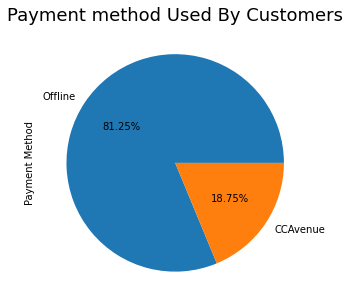

In [36]:
def Payment_method():
        fig = plt.figure()
        plt.title('Payment method Used By Customers',fontsize=18)
        df1['Payment Method'].dropna().str.split().apply(lambda x:x[0]).value_counts().plot(kind = 'pie',autopct='%0.2f%%',figsize=(10,5))
Payment_method()
        

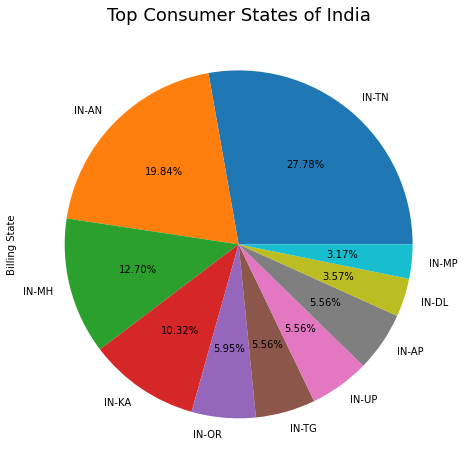

In [38]:
def Top_consumer_state():
            fig = plt.figure()
            plt.title('Top Consumer States of India',fontsize=18)
            df1["Billing State"].dropna().value_counts().head(10).plot(kind = 'pie',figsize=(10,8),autopct='%0.2f%%')
Top_consumer_state()           

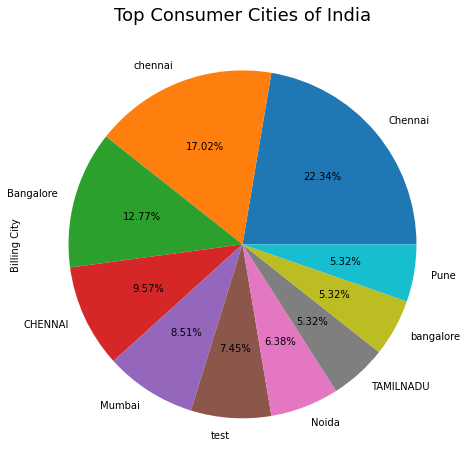

In [39]:
def Top_consumer_Cities():
    fig = plt.figure()
    plt.title('Top Consumer Cities of India',fontsize=18)
    df1["Billing City"].dropna().value_counts().head(10).plot(kind = 'pie',figsize=(10,8),autopct='%0.2f%%')
Top_consumer_Cities()

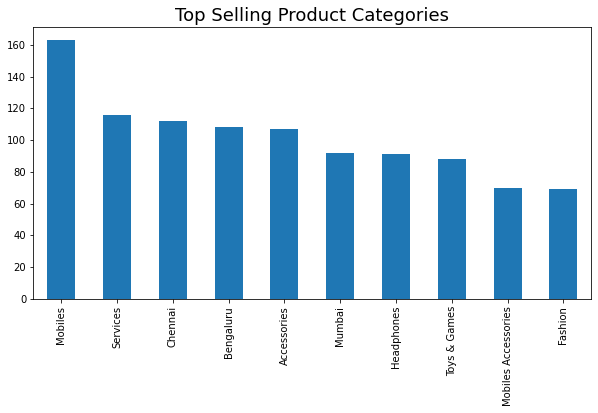

In [44]:
def Top_selling_Categories():
    fig = plt.figure()
    plt.title('Top Selling Product Categories',fontsize=18)
    df2["category"].value_counts().head(10).plot(kind = 'bar',figsize=(10,5))
Top_selling_Categories()

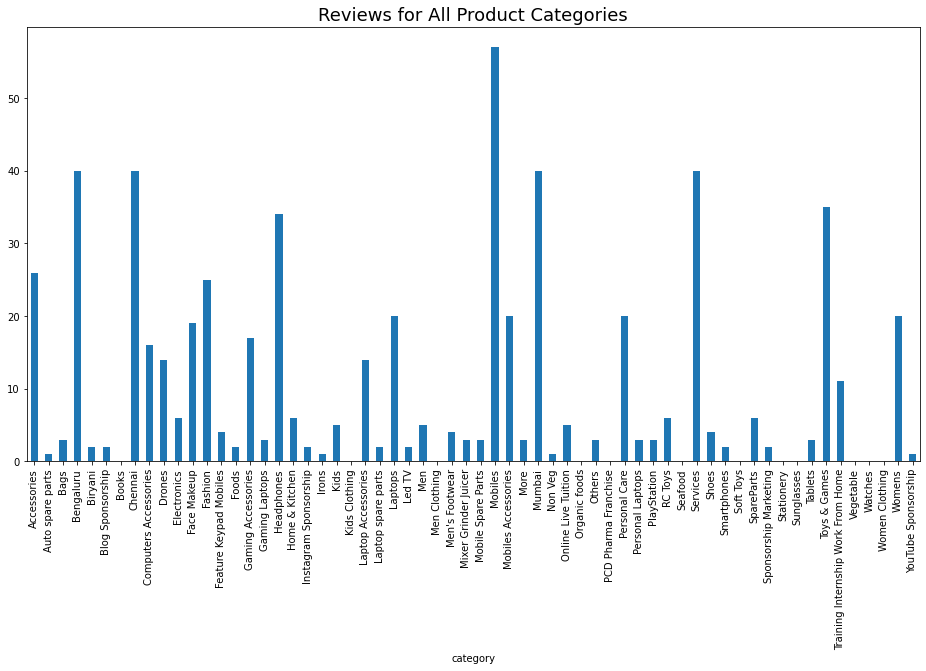

In [45]:
def Review_all_pro_categ():
    fig = plt.figure()
    plt.title('Reviews for All Product Categories',fontsize=18)
    df2.groupby('category')['stars'].count().plot(kind='bar',figsize=(16,8))
Review_all_pro_categ()

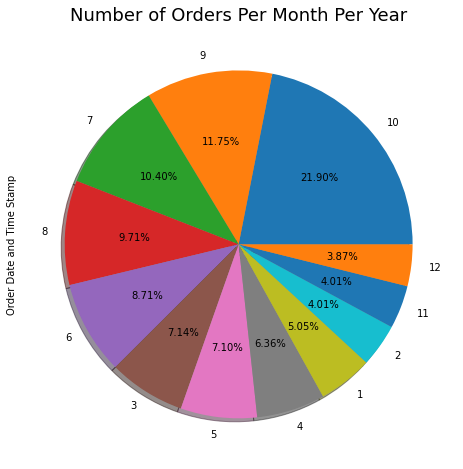

In [46]:
def Order_per_month():
    fig = plt.figure()
    plt.title('Number of Orders Per Month Per Year',fontsize=18)
    pd.to_datetime(df1['Order Date and Time Stamp']).dt.month.value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,figsize=(16,8))
Order_per_month()

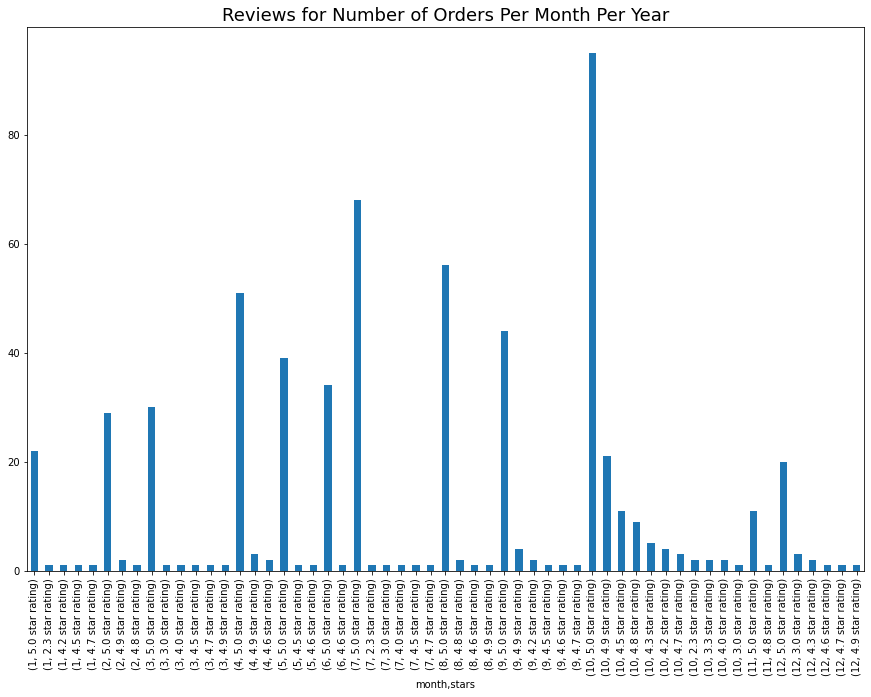

In [49]:
def Review_order_per_month():
    fig = plt.figure()
    plt.title('Reviews for Number of Orders Per Month Per Year',fontsize=18)
    df2['month'] = pd.to_datetime(df1['Order Date and Time Stamp']).dt.month
    df2.groupby("month")['stars'].value_counts().plot(kind='bar',figsize=(15,10))
Review_order_per_month()

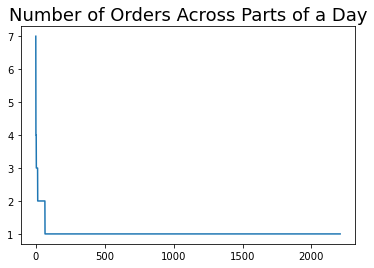

In [50]:
def Order_Part_day():
    fig = plt.figure()
    plt.title('Number of Orders Across Parts of a Day',fontsize=18)
    Orders =pd.to_datetime(df1['Order Date and Time Stamp']).dt.strftime('%H:%M:%S').value_counts().values
    plt.plot(Orders)
Order_Part_day()

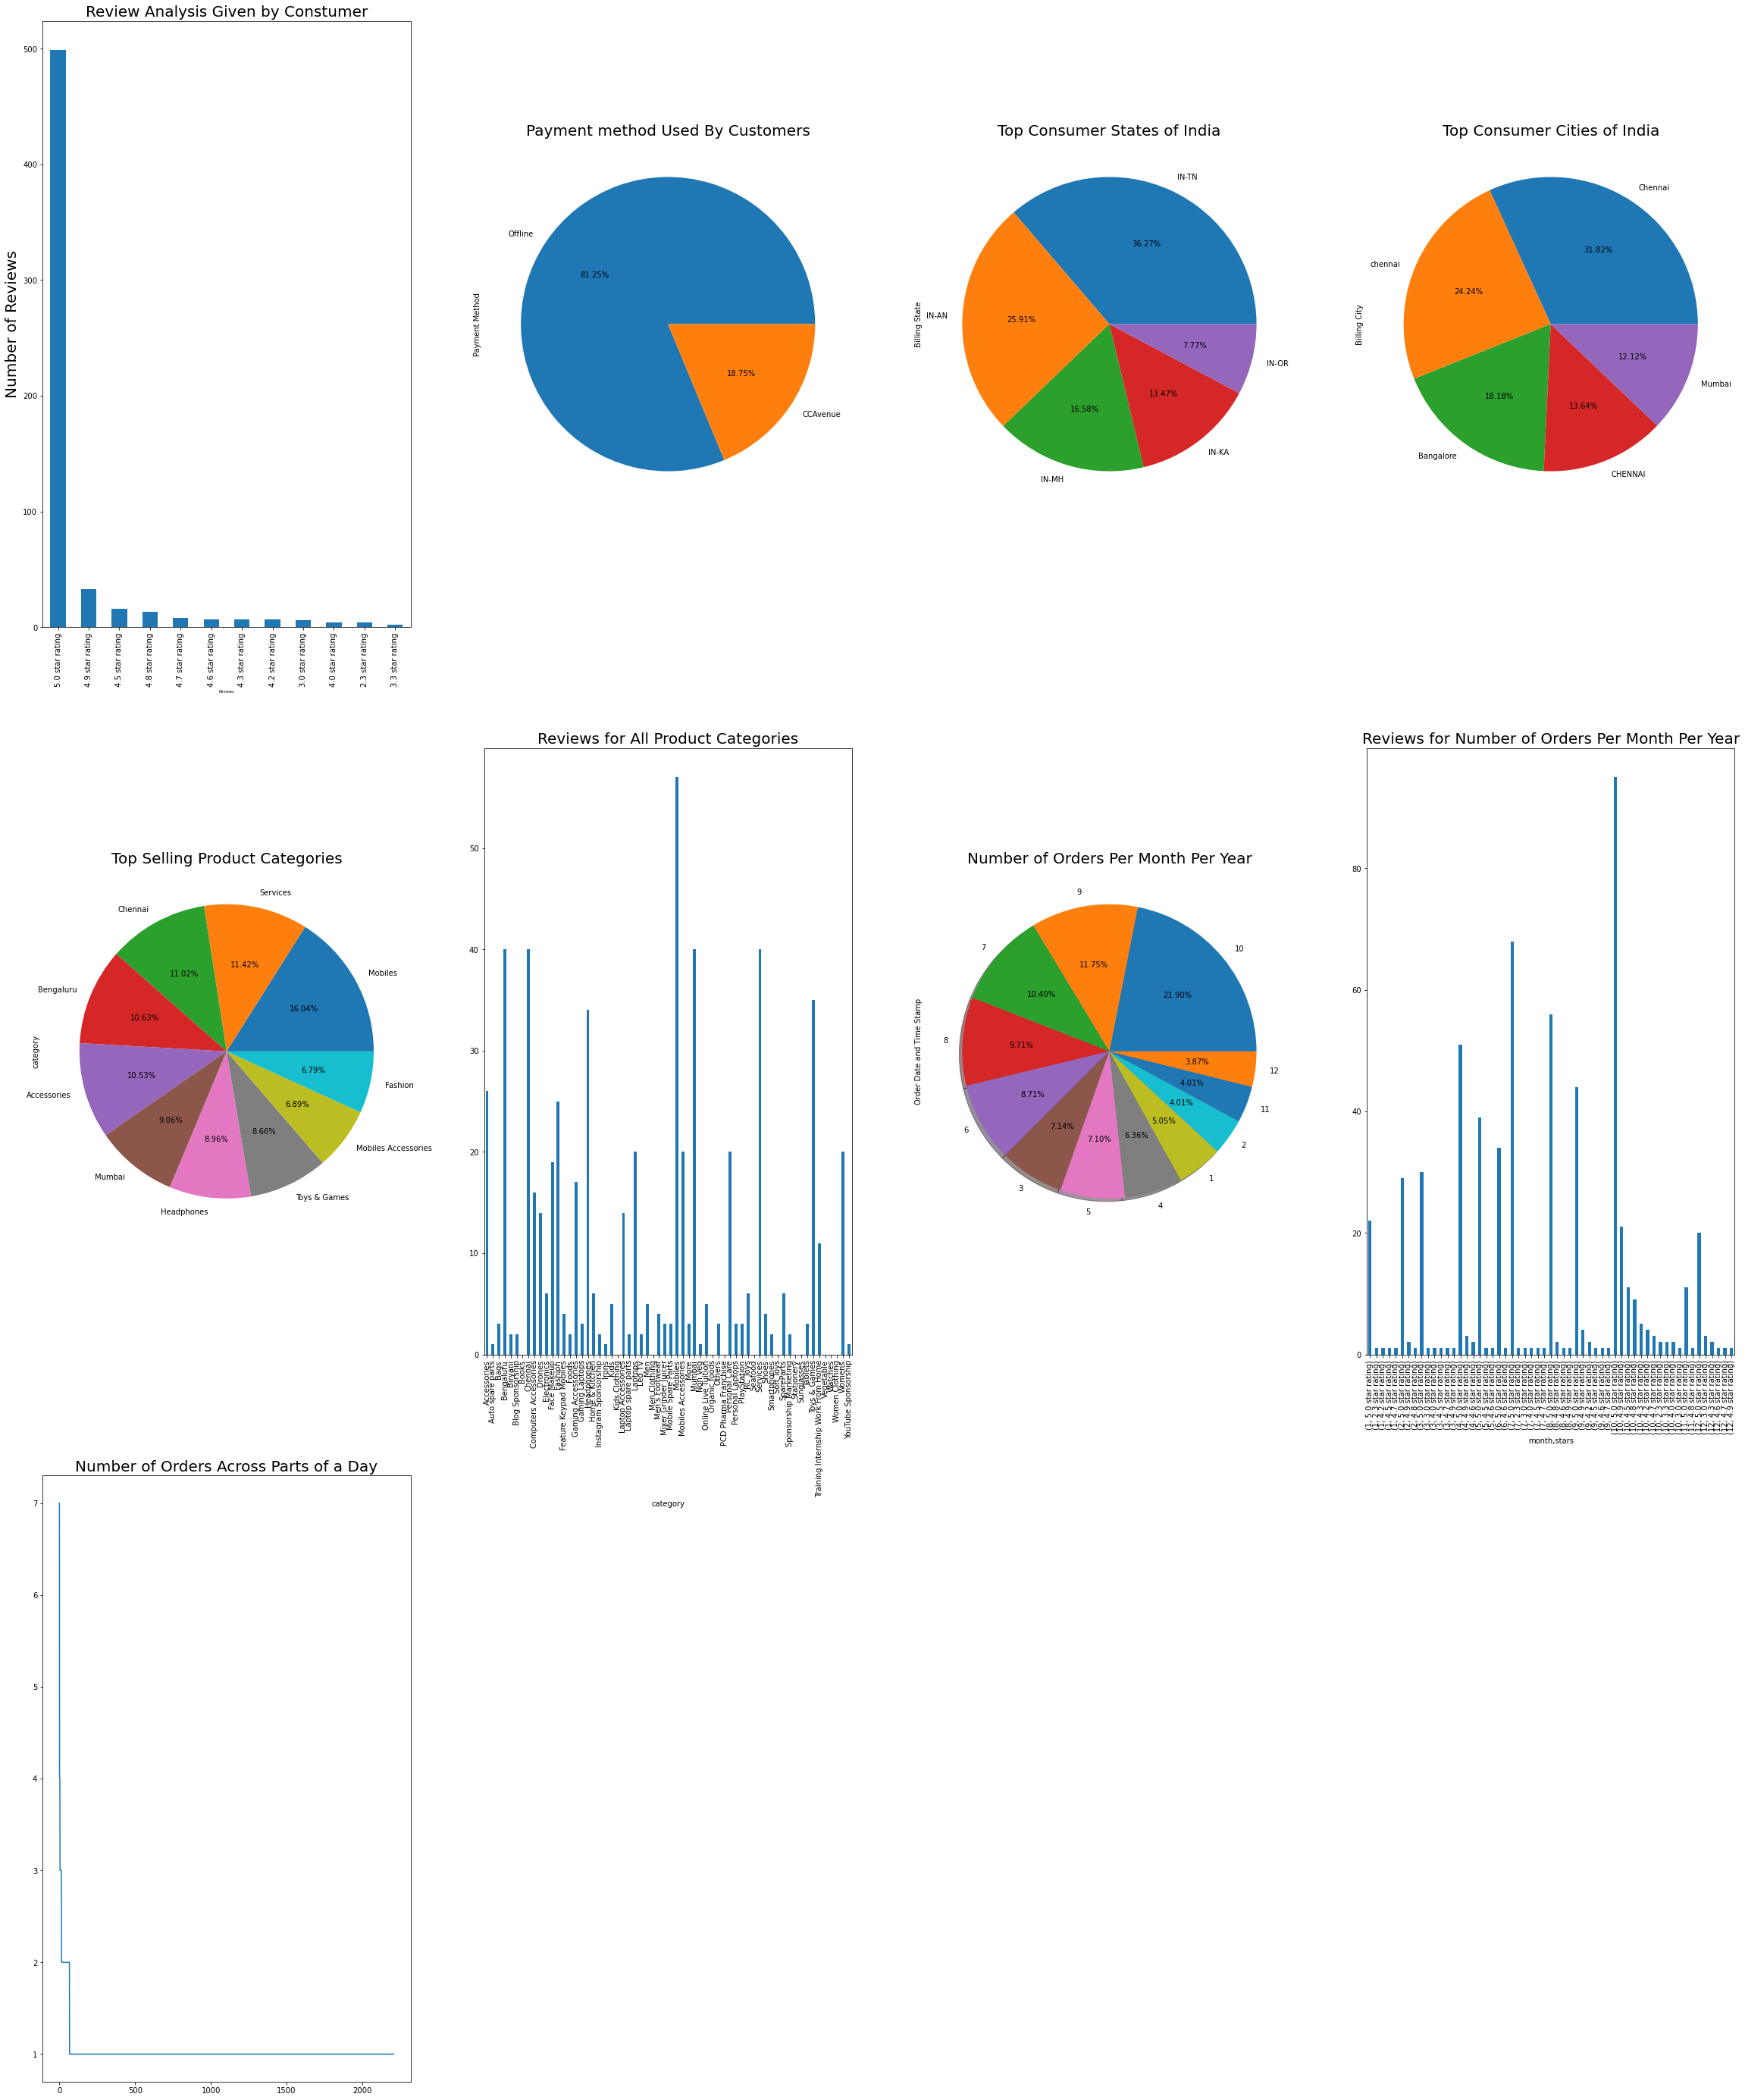

In [52]:
def Full_Report():
    fig = plt.figure()
    plt.subplot(3,4,1)
    plt.title('Review Analysis Given by Constumer',fontsize=20)
    review_count=df2['stars'].value_counts()
    review_count.plot(kind='bar',label ='<2.0 is negative rating')
    plt.ylabel("Number of Reviews",fontsize=20)
    plt.xlabel("Reviews",fontsize=5)
    plt.show
    plt.legend
    plt.subplot(3,4,2)
    plt.title('Payment method Used By Customers',fontsize=20)
    df1['Payment Method'].dropna().str.split().apply(lambda x:x[0]).value_counts().plot(kind = 'pie',autopct='%0.2f%%',figsize=(8,4))
    plt.subplot(3,4,3)
    plt.title('Top Consumer States of India',fontsize=20)
    df1["Billing State"].dropna().value_counts().head().plot(kind = 'pie',figsize=(10,5),autopct='%0.2f%%')
    plt.subplot(3,4,4)
    plt.title('Top Consumer Cities of India',fontsize=20)
    df1["Billing City"].dropna().value_counts().head().plot(kind = 'pie',figsize=(10,5),autopct='%0.2f%%')
    plt.subplot(3,4,5)
    plt.title('Top Selling Product Categories',fontsize=20)
    df2["category"].value_counts().head(10).plot(kind = 'pie',figsize=(10,5),autopct='%0.2f%%')
    plt.subplot(3,4,6)
    plt.title('Reviews for All Product Categories',fontsize=20)
    df2.groupby('category')['stars'].count().plot(kind='bar',figsize=(40,50))
    plt.subplot(3,4,7)
    plt.title('Number of Orders Per Month Per Year',fontsize=20)
    pd.to_datetime(df1['Order Date and Time Stamp']).dt.month.value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,figsize=(8,4))
    plt.subplot(3,4,8)
    plt.title('Reviews for Number of Orders Per Month Per Year',fontsize=20)
    df2['month'] = pd.to_datetime(df1['Order Date and Time Stamp']).dt.month
    df2.groupby("month")['stars'].value_counts().plot(kind='bar',figsize=(40,50))
    plt.subplot(3,4,9)
    plt.title('Number of Orders Across Parts of a Day',fontsize=20)
    Orders =pd.to_datetime(df1['Order Date and Time Stamp']).dt.strftime('%H:%M:%S').value_counts().values
    plt.plot(Orders)
Full_Report()

In [54]:
Statement = '''1. Enter 1 to see the analysis of Reviews given by Customers
2. Enter 2 to see the analysis of different payment methods used by the Customers
3. Enter 3 to see the analysis of Top Consumer States of India
4. Enter 4 to see the analysis of Top Consumer Cities of India
5. Enter 5 to see the analysis of Top Selling Product Categories
6. Enter 6 to see the analysis of Reviews for All Product Categories
7. Enter 7 to see the analysis of Number of Orders Per Month Per Year
8. Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year
9. Enter 9 to see the analysis of Number of Orders Across Parts of a Day
10. Enter 10 to see the Full Report
11. Enter 11 for exit'''

1. Enter 1 to see the analysis of Reviews given by Customers
2. Enter 2 to see the analysis of different payment methods used by the Customers
3. Enter 3 to see the analysis of Top Consumer States of India
4. Enter 4 to see the analysis of Top Consumer Cities of India
5. Enter 5 to see the analysis of Top Selling Product Categories
6. Enter 6 to see the analysis of Reviews for All Product Categories
7. Enter 7 to see the analysis of Number of Orders Per Month Per Year
8. Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year
9. Enter 9 to see the analysis of Number of Orders Across Parts of a Day
10. Enter 10 to see the Full Report
11. Enter 11 for exit
Enter the number to see the task report : 2
Enter the number to see the task report : 3
Enter the number to see the task report : 4
Enter the number to see the task report : 5
Enter the number to see the task report : 6
Enter the number to see the task report : 7
Enter the number to see the task report : 11


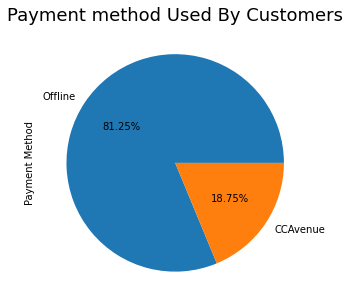

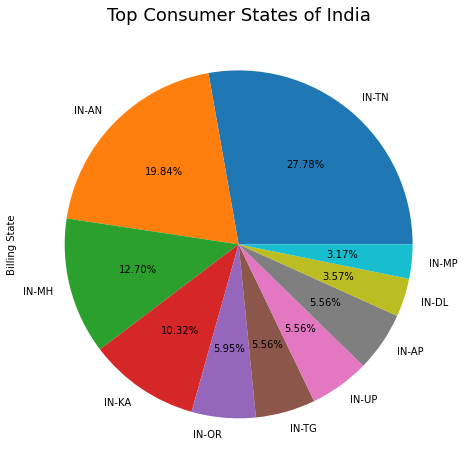

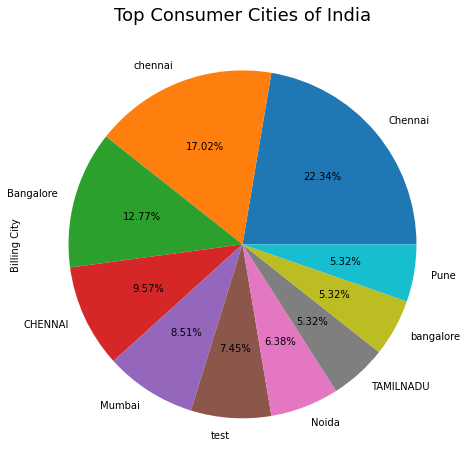

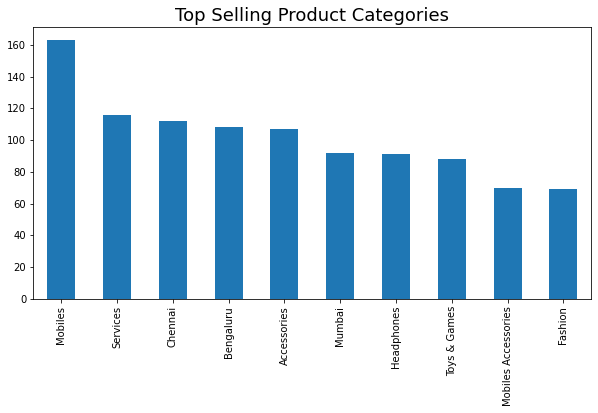

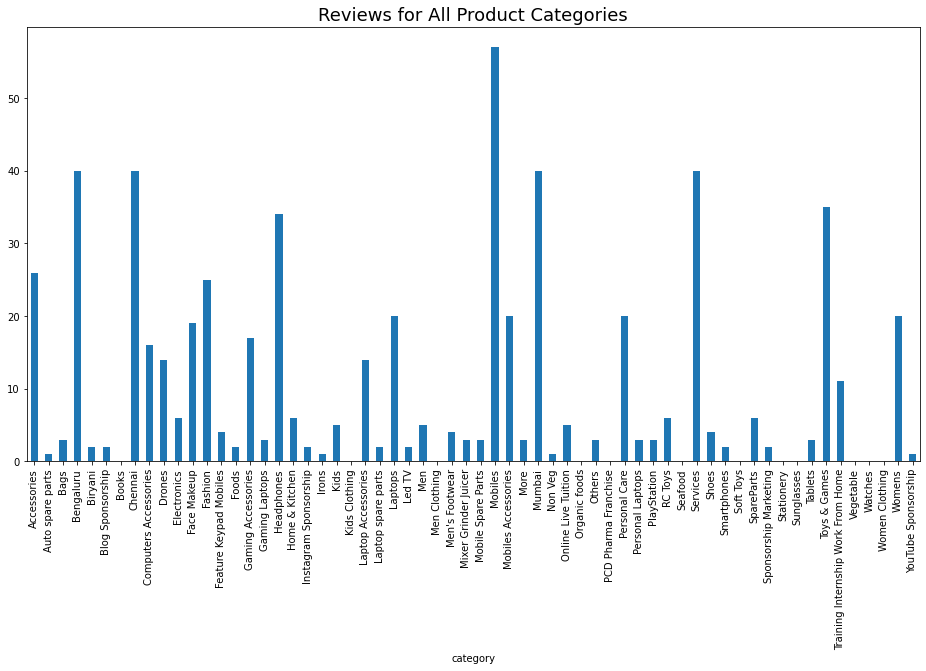

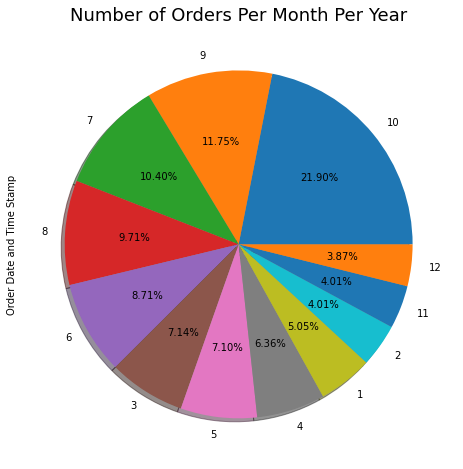

In [55]:
print(Statement)
while True:
    Input = input('Enter the number to see the task report : ')
    if Input == '1':
        Review_Analysis()
    if Input == '2':
        Payment_method()
    if Input == '3':
        Top_consumer_state()
    if Input == '4':
        Top_consumer_Cities()
    if Input == '5':
        Top_selling_Categories()
    if Input == '6':
        Review_all_pro_categ()
    if Input == '7':
        Order_per_month()
    if Input == '8':
        Review_order_per_month()
    if Input == '9':
        Order_Part_day()
    if Input == '10':
        Full_Report()
    if Input ==  '11':
        break

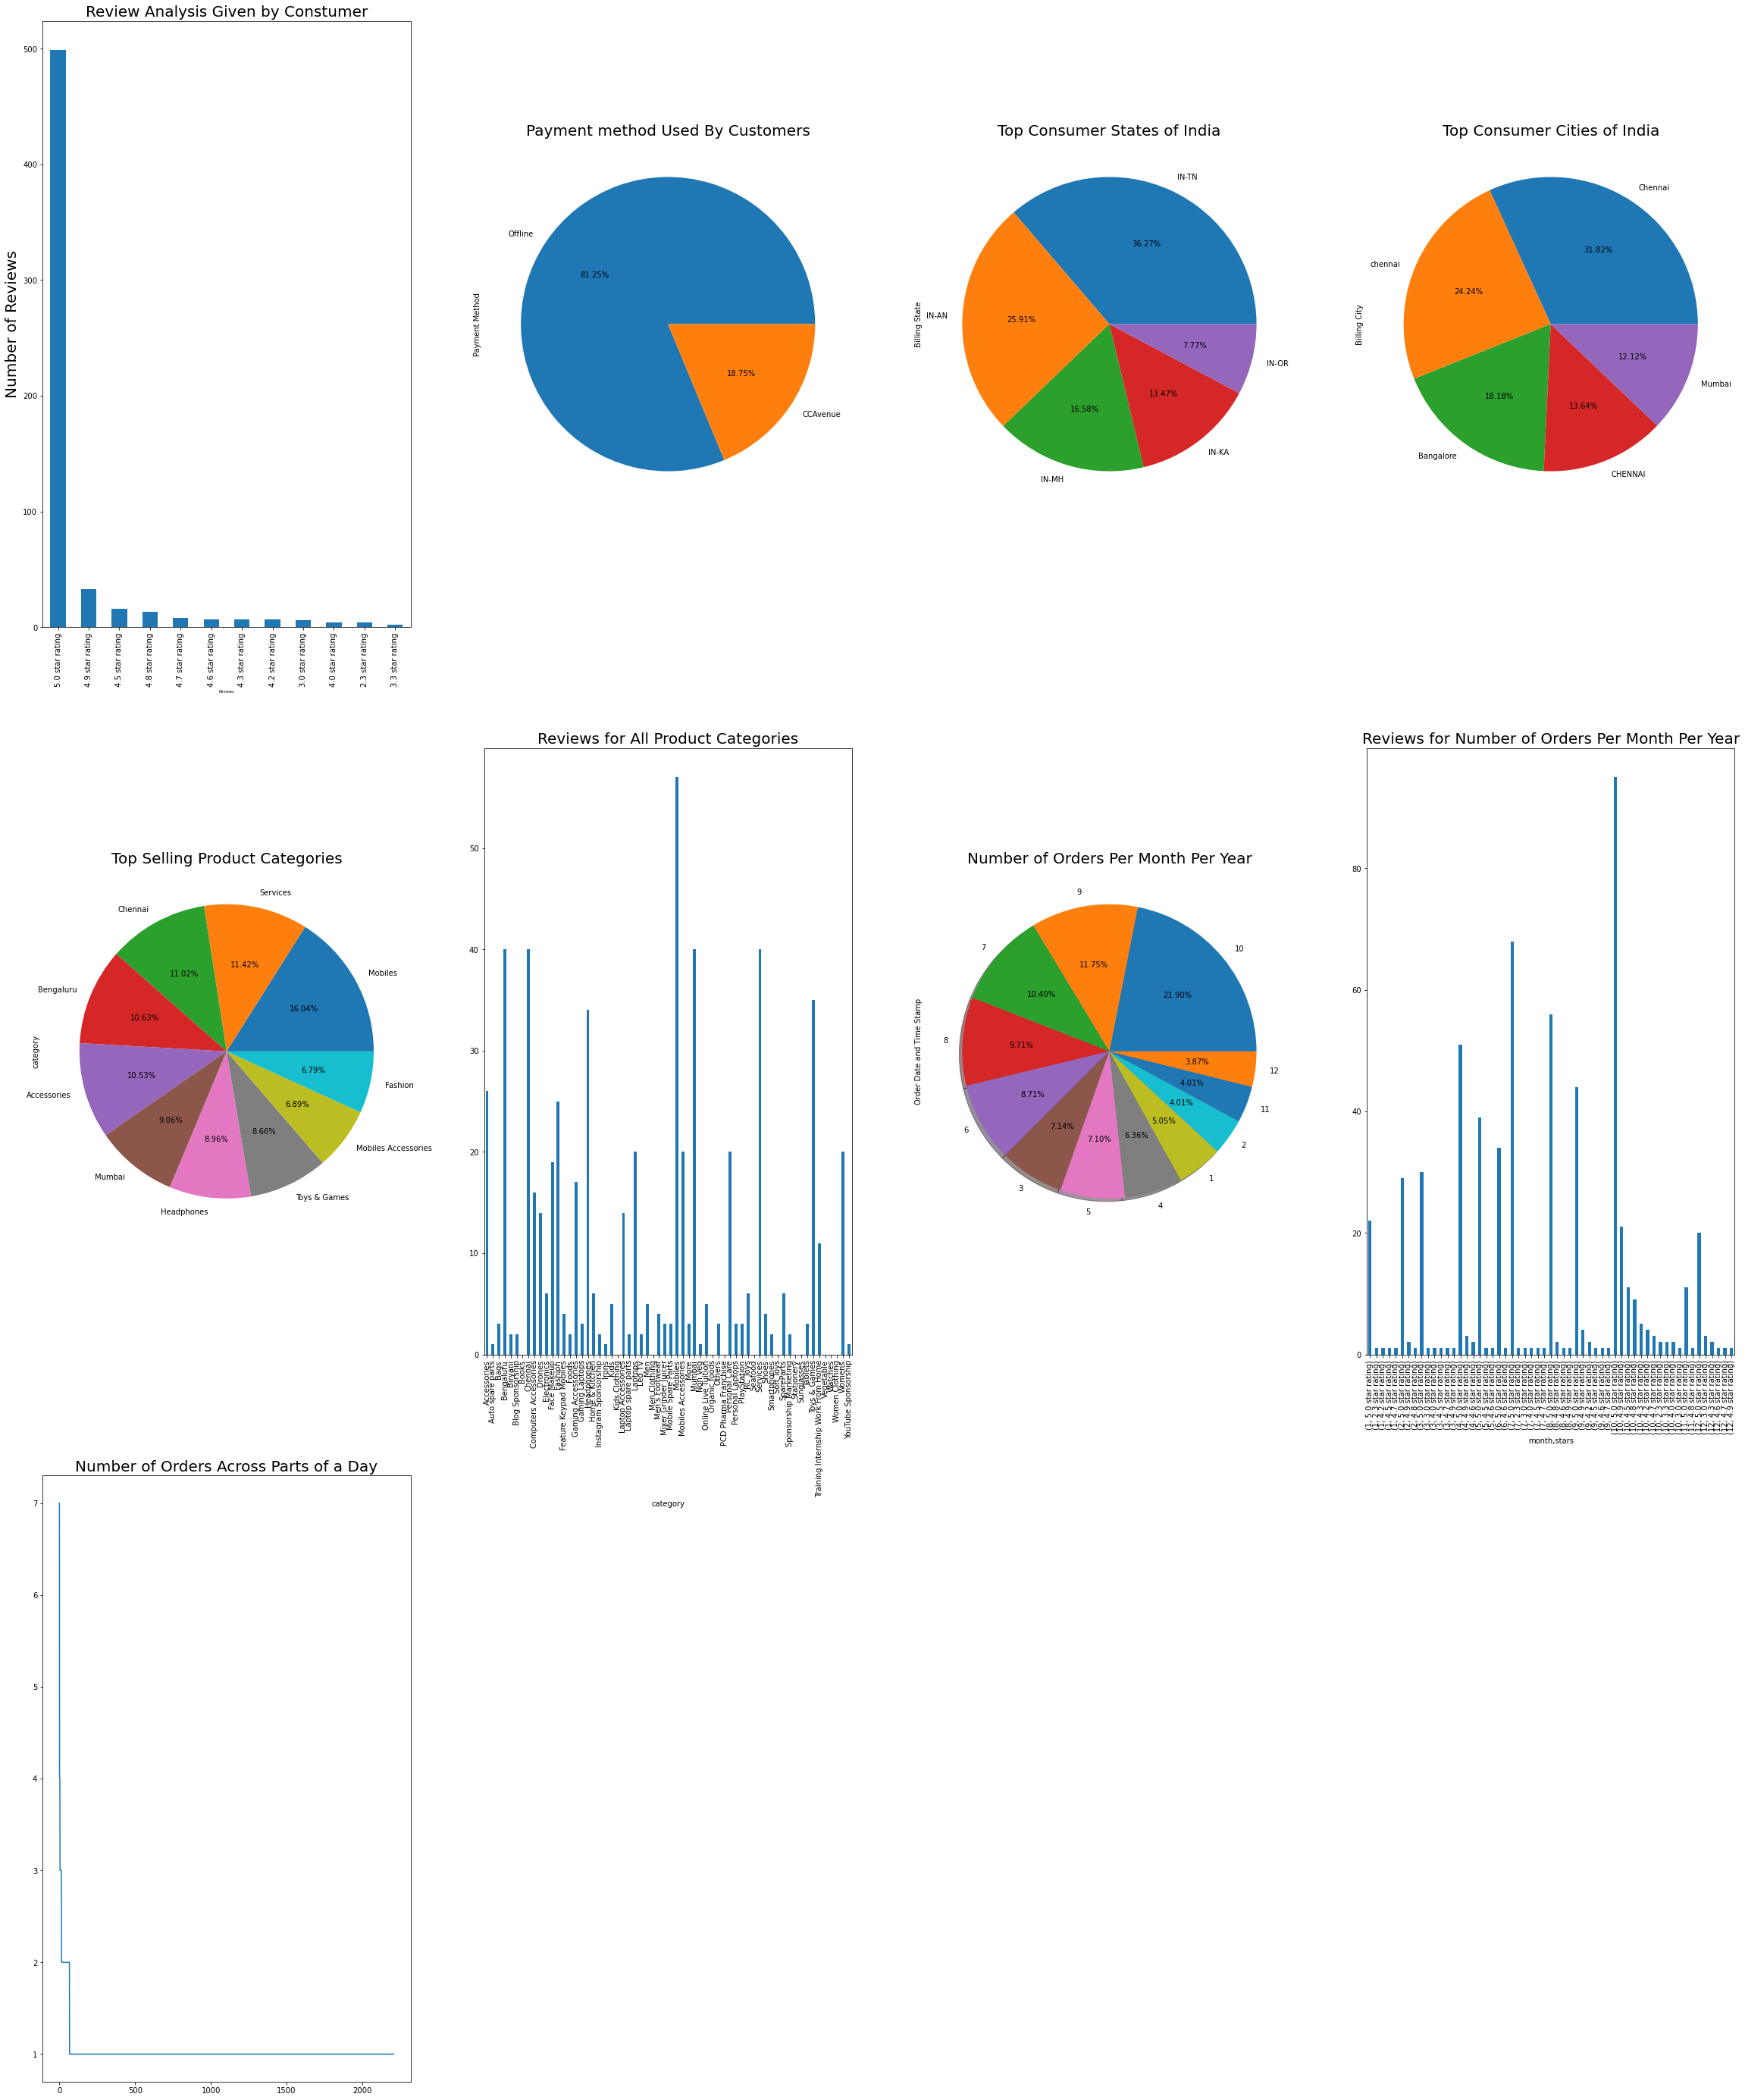

In [58]:
def Full_Report():
    fig = plt.figure()
    plt.subplot(3,4,1)
    plt.title('Review Analysis Given by Constumer',fontsize=20)
    review_count=df2['stars'].value_counts()
    review_count.plot(kind='bar',label ='<2.0 is negative rating')
    plt.ylabel("Number of Reviews",fontsize=20)
    plt.xlabel("Reviews",fontsize=5)
    plt.show
    plt.legend
    plt.subplot(3,4,2)
    plt.title('Payment method Used By Customers',fontsize=20)
    df1['Payment Method'].dropna().str.split().apply(lambda x:x[0]).value_counts().plot(kind = 'pie',autopct='%0.2f%%',figsize=(8,4))
    plt.subplot(3,4,3)
    plt.title('Top Consumer States of India',fontsize=20)
    df1["Billing State"].dropna().value_counts().head().plot(kind = 'pie',figsize=(10,5),autopct='%0.2f%%')
    plt.subplot(3,4,4)
    plt.title('Top Consumer Cities of India',fontsize=20)
    df1["Billing City"].dropna().value_counts().head().plot(kind = 'pie',figsize=(10,5),autopct='%0.2f%%')
    plt.subplot(3,4,5)
    plt.title('Top Selling Product Categories',fontsize=20)
    df2["category"].value_counts().head(10).plot(kind = 'pie',figsize=(10,5),autopct='%0.2f%%')
    plt.subplot(3,4,6)
    plt.title('Reviews for All Product Categories',fontsize=20)
    df2.groupby('category')['stars'].count().plot(kind='bar',figsize=(40,50))
    plt.subplot(3,4,7)
    plt.title('Number of Orders Per Month Per Year',fontsize=20)
    pd.to_datetime(df1['Order Date and Time Stamp']).dt.month.value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,figsize=(8,4))
    plt.subplot(3,4,8)
    plt.title('Reviews for Number of Orders Per Month Per Year',fontsize=20)
    df2['month'] = pd.to_datetime(df1['Order Date and Time Stamp']).dt.month
    df2.groupby("month")['stars'].value_counts().plot(kind='bar',figsize=(40,50))
    plt.subplot(3,4,9)
    plt.title('Number of Orders Across Parts of a Day',fontsize=20)
    Orders =pd.to_datetime(df1['Order Date and Time Stamp']).dt.strftime('%H:%M:%S').value_counts().values
    plt.plot(Orders)
    wb = xw.Book()
    sht = wb.sheets[0]
    sht.name = "excel charts"
    sht.pictures.add(fig, name="Excel Charts", update=True, left=sht.range("A4").left, top=sht.range("A4").top,
                         height=1000, width=1500)
Full_Report()